# Spiral Dataset: Custom vs PyTorch Neural Network

This notebook trains identical models on the spiral dataset from https://cs231n.github.io/neural-networks-case-study/

First, I train a homemade neural network using the cnn module I built. Then train a neural network of identical strcuture using PyTorch as a comparison.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
from cnn import Sequential 
from cnn.layers import Linear, ReLU, Softmax
from cnn.loss import CrossEntropyLoss
from cnn.optim import Adam
from cnn.utils import generate_spiral_data, plot_spiral_data_decision_boundary, train_val_test_split, train_val, plot_training_metrics, test

### 1. Load and Visualize Data

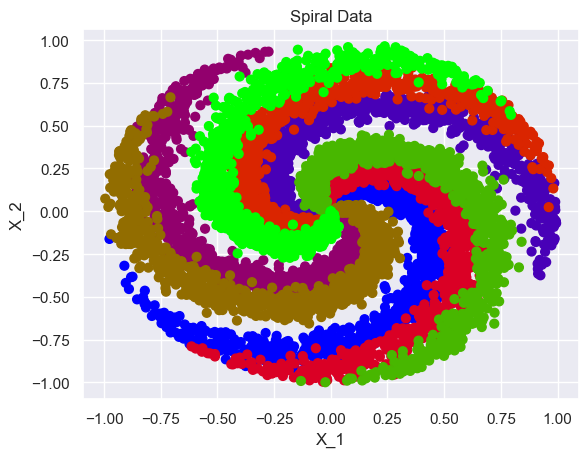

In [3]:
N = 1000 # number of points per class
D = 2 # dimensionality
K = 8 # number of classes
X, y = generate_spiral_data(N, D, K)
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y)

### 2. Build, Train, and Test Homemade Model

In [18]:
ordered_layers = [
      Linear(D, 32),
      ReLU(),
      Linear(32, 16),
      ReLU(),
      Linear(16, K),
      Softmax()
    ]

loss = CrossEntropyLoss()
optim = Adam(lr=1e-3)
model = Sequential(
  layers=ordered_layers,
  loss_func = loss,
  optimizer = optim
)
EPOCHS = 100
batch_size = 32
train_losses, train_accuracies, val_losses, val_accuracies = train_val(model, X_train, y_train, X_val, y_val, epochs=EPOCHS, verbose_freq = 10)

Epoch 10, Train Loss: 0.813295, Train Accuracy: 0.732500, Val Loss: 0.774846, Val Accuracy: 0.738333
Epoch 20, Train Loss: 0.551059, Train Accuracy: 0.813929, Val Loss: 0.534565, Val Accuracy: 0.815833
Epoch 30, Train Loss: 0.456278, Train Accuracy: 0.835893, Val Loss: 0.446495, Val Accuracy: 0.835000
Epoch 40, Train Loss: 0.404928, Train Accuracy: 0.851607, Val Loss: 0.397137, Val Accuracy: 0.847500
Epoch 50, Train Loss: 0.373915, Train Accuracy: 0.862143, Val Loss: 0.368596, Val Accuracy: 0.854167
Epoch 60, Train Loss: 0.352453, Train Accuracy: 0.867857, Val Loss: 0.348076, Val Accuracy: 0.866667
Epoch 70, Train Loss: 0.338497, Train Accuracy: 0.872679, Val Loss: 0.333676, Val Accuracy: 0.870000
Epoch 80, Train Loss: 0.328294, Train Accuracy: 0.873929, Val Loss: 0.323261, Val Accuracy: 0.874167
Epoch 90, Train Loss: 0.320746, Train Accuracy: 0.877143, Val Loss: 0.315368, Val Accuracy: 0.876667
Epoch 100, Train Loss: 0.314458, Train Accuracy: 0.880536, Val Loss: 0.309017, Val Accuracy

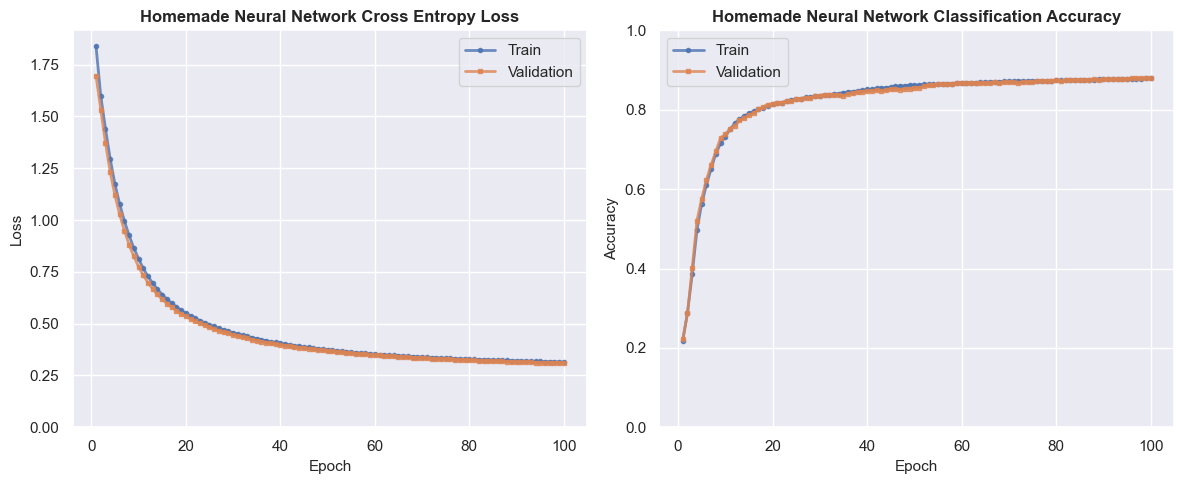

Test Loss: 0.359340, Test Accuracy: 0.866667


In [20]:
plot_training_metrics(
    train_losses=train_losses,
    train_accuracies=train_accuracies,
    val_losses=val_losses,
    val_accuracies=val_accuracies,
    title="Homemade Neural Network"
)
test_loss, test_accuracy = test(model, X_test, y_test)

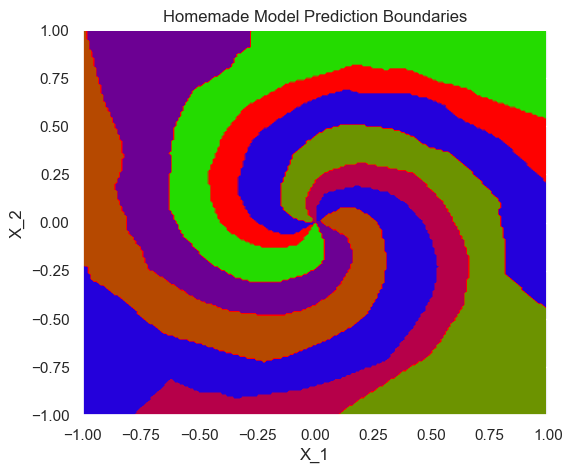

In [21]:
plot_spiral_data_decision_boundary(model, title='Homemade Model Prediction Boundaries')

### 3. Build, Train, and Test PyTorch Model for Comparison

In [22]:
import torch.nn.functional as F
import torch.nn as nn 
import torch.optim as optim 
from sklearn.model_selection import train_test_split
from pytorch_utils import pytorch_generate_dataloader, pytorch_train_val, pytorch_test, pytorch_plot_spiral_data_decision_boundary

In [23]:
batch_size = 32 
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=.5, random_state=42)


dataloader_train = pytorch_generate_dataloader(X_train, y_train, batch_size)
dataloader_val = pytorch_generate_dataloader(X_val, y_val, batch_size)
dataloader_test = pytorch_generate_dataloader(X_test, y_test, batch_size)


In [9]:
class Net(nn.Module):
  def __init__(self, input_size, num_classes):
    super().__init__()
    self.fc1 = nn.Linear(input_size, 32)
    self.fc2 = nn.Linear(32, 16)
    self.fc3 = nn.Linear(16, num_classes)
    
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.softmax(self.fc3(x), dim=1)
    return x
    

In [26]:
EPOCHS = 100
model = Net(D, K)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss() 

train_losses, train_accuracies, val_losses, val_accuracies = pytorch_train_val(
  model,
  dataloader_train,
  dataloader_val,
  criterion,
  optimizer,
  epochs=EPOCHS,
  verbose_freq = 10
)

Epoch 10, Train Loss: 1.908643, Train Accuracy: 0.413929, Val Loss: 1.900482, Val Accuracy: 0.412500
Epoch 20, Train Loss: 1.776680, Train Accuracy: 0.574464, Val Loss: 1.758323, Val Accuracy: 0.582500
Epoch 30, Train Loss: 1.689907, Train Accuracy: 0.661429, Val Loss: 1.670977, Val Accuracy: 0.677500
Epoch 40, Train Loss: 1.638869, Train Accuracy: 0.705893, Val Loss: 1.620732, Val Accuracy: 0.728333
Epoch 50, Train Loss: 1.602644, Train Accuracy: 0.738750, Val Loss: 1.586671, Val Accuracy: 0.754167
Epoch 60, Train Loss: 1.575181, Train Accuracy: 0.761429, Val Loss: 1.563123, Val Accuracy: 0.764167
Epoch 70, Train Loss: 1.554315, Train Accuracy: 0.774464, Val Loss: 1.547225, Val Accuracy: 0.777500
Epoch 80, Train Loss: 1.538894, Train Accuracy: 0.781786, Val Loss: 1.535276, Val Accuracy: 0.780000
Epoch 90, Train Loss: 1.524018, Train Accuracy: 0.789643, Val Loss: 1.520917, Val Accuracy: 0.792500
Epoch 100, Train Loss: 1.497659, Train Accuracy: 0.816786, Val Loss: 1.502554, Val Accuracy

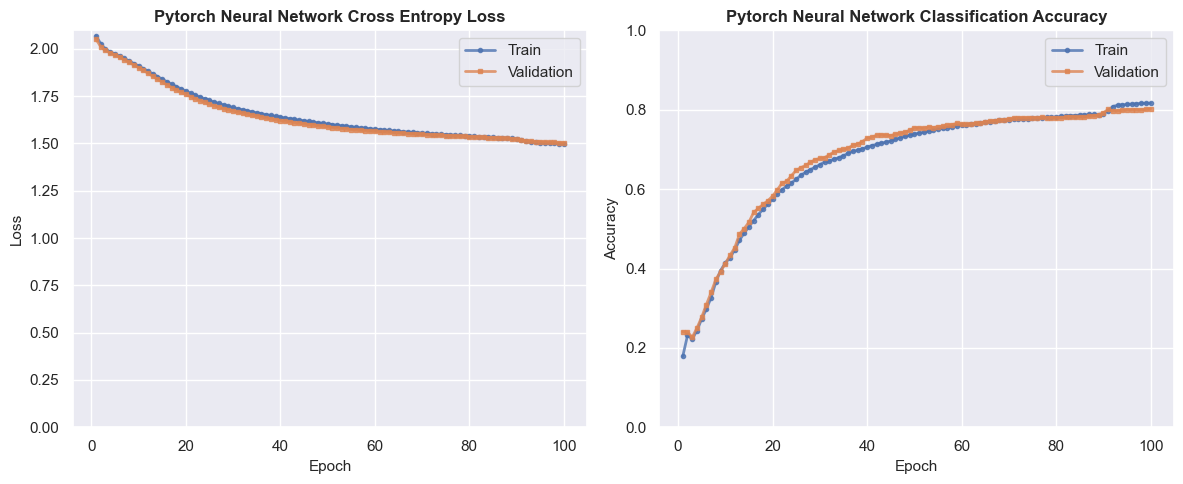

Test Loss: 1.510919, Test Accuracy: 0.797500


In [27]:
plot_training_metrics(
    train_losses=train_losses,
    train_accuracies=train_accuracies,
    val_losses=val_losses,
    val_accuracies=val_accuracies,
    title="Pytorch Neural Network"
)

test_loss, test_accuracy = pytorch_test(model, dataloader_test, criterion)

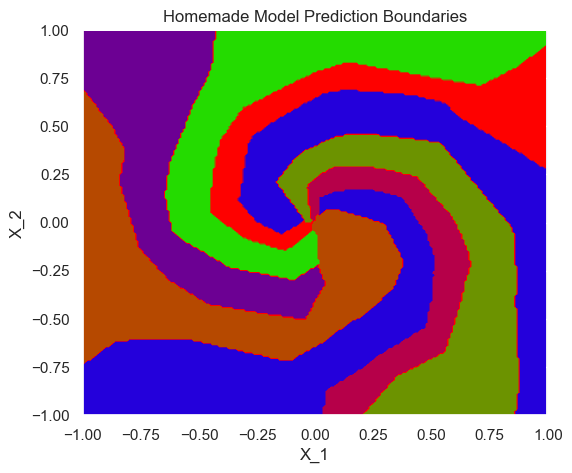

In [ ]:
pytorch_plot_spiral_data_decision_boundary(model, title='Pytorch Model Prediction Boundaries')